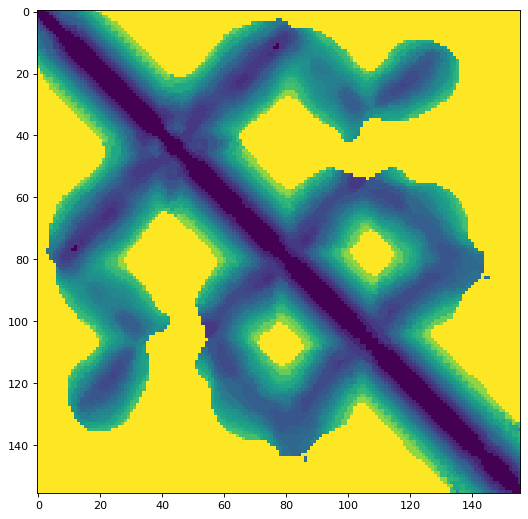

In [1]:
import torch
import util
x = torch.load('cust_6SSW/dist')
util.plot_image(x)

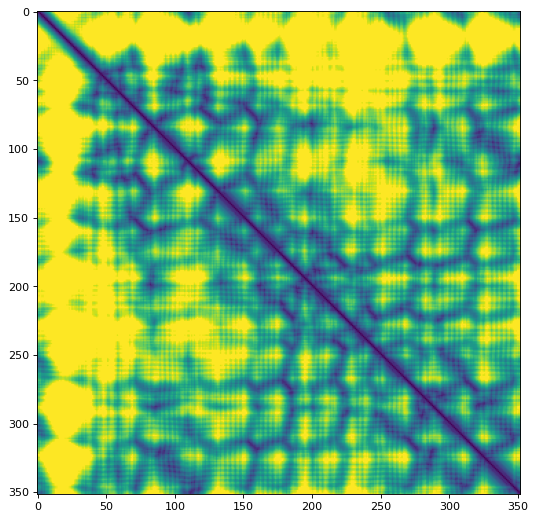

In [70]:
x = util.distm_pdb('agma/agma_af.pdb')
util.plot_image(x)

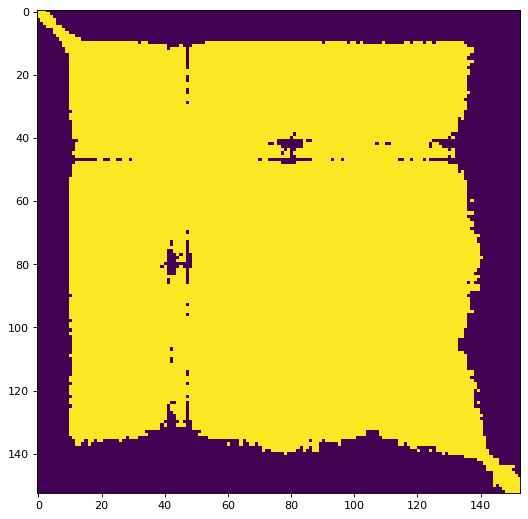

In [9]:
x = torch.load('af2_6SSW/confidence_mask')
util.plot_image(x)

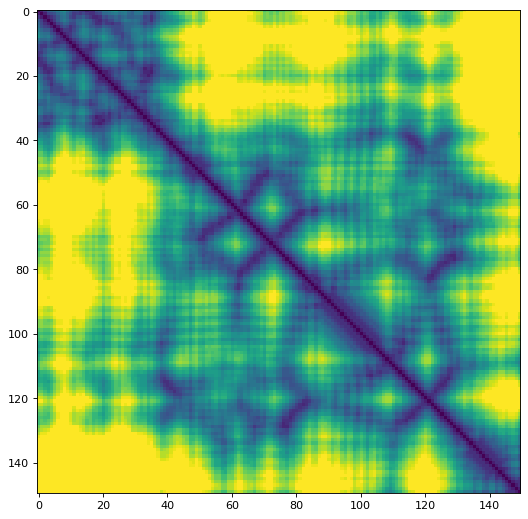

In [289]:
x = util.distm_pdb('./nuak/nuak_model1.pdb')
util.plot_image(x[:150,:150])

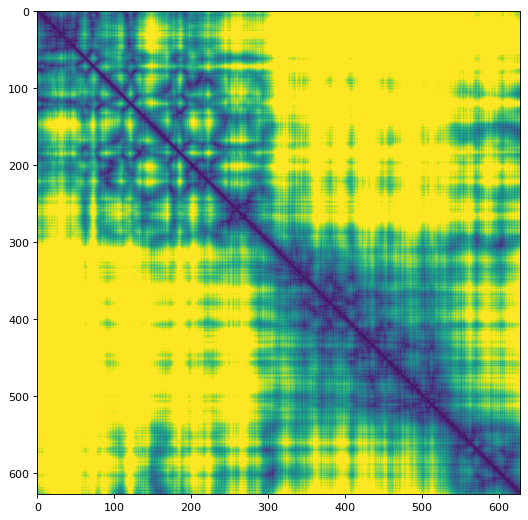

In [3]:
x = util.distm_pdb('/home/ychnh/DMPfold2/data/foldtest.pdb')
util.plot_image(x)

In [365]:
import torch
from torch.nn import functional as F
dm = torch.load('cust_distm_cdpk/dist').unsqueeze(0)
dm.shape
dm = util.distm_pdb('agma/agma_af.pdb').unsqueeze(0)
nres = dm.shape[-1]

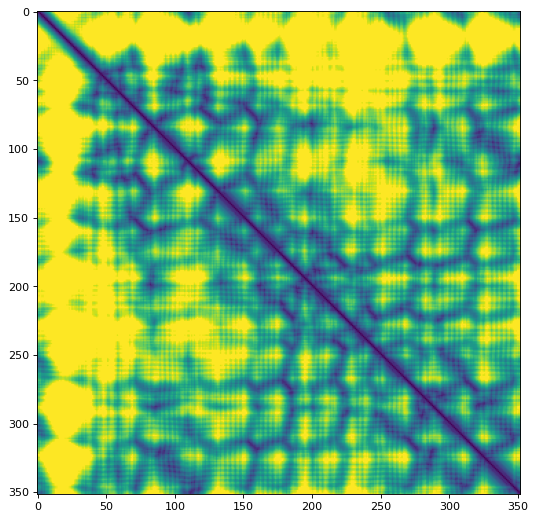

In [368]:
#dm = dm[:,:150,:150]
nres = dm.shape[-1]
dm.shape
util.plot_image(dm[0])

In [371]:

dm = torch.cat([dm,dm], dim=0)
dm.shape

torch.Size([2, 352, 352])

In [372]:
# MDS()
# distance map of shape cxHxW

M = 0.5 * (dm[:, 0:1, :].expand(-1, nres, -1) ** 2 + dm[:, :, 0:1].expand(-1, -1, nres) ** 2 - dm ** 2)
w, v = torch.symeig(M.float(), eigenvectors=True)
w = torch.clamp(F.relu(w, inplace=False), min = 1e-8)
w = torch.diag_embed(w.sqrt())
mds_coords = torch.matmul(v, w)[:, :, -8:]
mds_coords.shape

torch.Size([2, 352, 8])

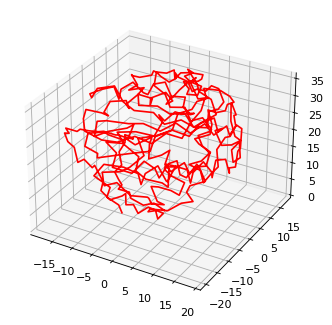

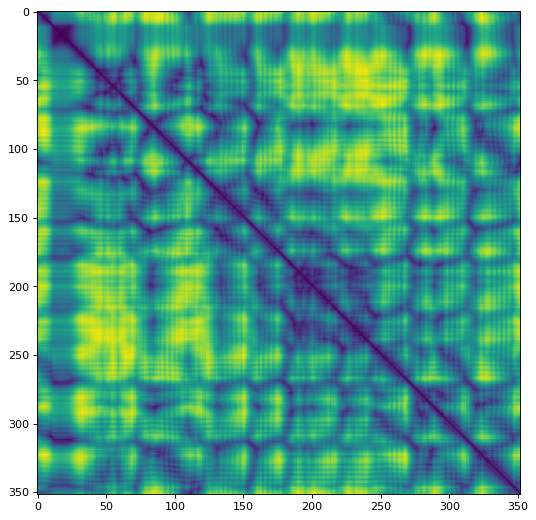

In [376]:
import data

i=5
x = mds_coords[1,:,i:i+3]
util.plot_chain(x)
temp = data.distm_chain(x.unsqueeze(0))[0]
util.plot_image(temp)

torch.Size([352, 3])


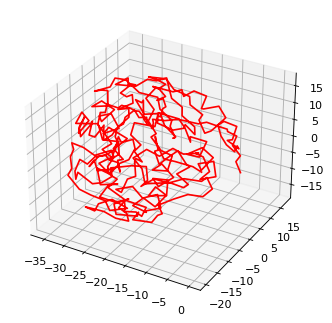

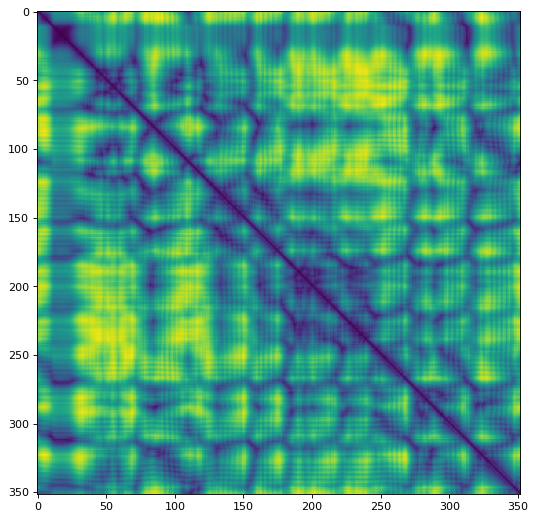

In [329]:
coord = util.mds_torch(dm, iters=0)[0]
print(coord.shape)
util.plot_chain(coord)
temp = data.distm_chain(coord.unsqueeze(0))[0]
util.plot_image(temp)

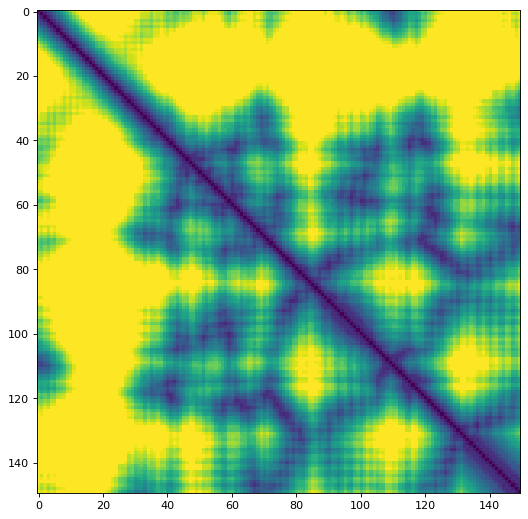

In [305]:
x = util.distm_pdb('agma/agma_af.pdb')
util.plot_image(x[:150,:150])

In [324]:
def tmscore(c1, c2):
    r1 = c1.transpose(0, 1)
    r2 = c2.transpose(0, 1)
    P = r1 - r1.mean(1).view(3, 1)
    Q = r2 - r2.mean(1).view(3, 1)
    cov = torch.matmul(P, Q.transpose(0, 1))
    try:
        U, S, Vh = torch.linalg.svd(cov)
        V = Vh.transpose(-2, -1).conj()
    except RuntimeError:
        return None
    d = torch.tensor([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0],
        [0.0, 0.0, torch.det(torch.matmul(V, U.transpose(0, 1)))]], device=c1.device)
    rot = torch.matmul(torch.matmul(V, d), U.transpose(0, 1))
    rot_P = torch.matmul(rot, P)
    diffs = rot_P - Q
    d0sq = ((1.24 * diffs.size(1) / 5 - 15.0) ** (1.0/3.0) - 1.8) ** 2;
    tmscores = 1.0 / (1.0 + (diffs ** 2).sum(0) / d0sq)
    return tmscores


In [338]:
coord.shape

torch.Size([352, 3])

In [339]:
coord.shape, x.shape
(1-tmscore(coord, x) ).

RuntimeError: shape '[3, 1]' is invalid for input of size 1056

In [331]:
(1-tmscore(x, x) ).mean()

tensor(0.)

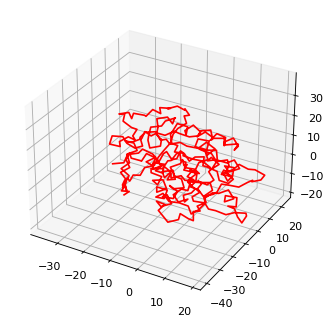

(tensor(0.9136), tensor(0.5212))

In [332]:
(1-tmscore(x, x) ).mean()
from importlib import reload
reload(util)
chn = util.chain_pdb('agma/agma_af.pdb')[0]
#chn = chn[0,:150]
util.plot_chain(chn)
temp = data.distm_chain(chn.unsqueeze(0))[0]
#util.plot_image(temp)
(1-tmscore(chn, x) ).mean(), (1-tmscore(chn, coord) ).mean()

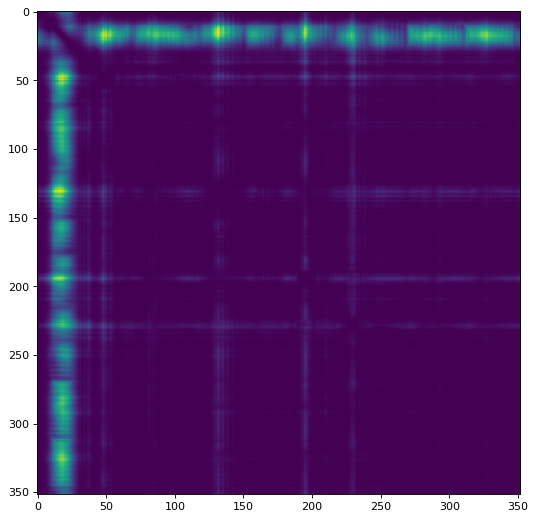

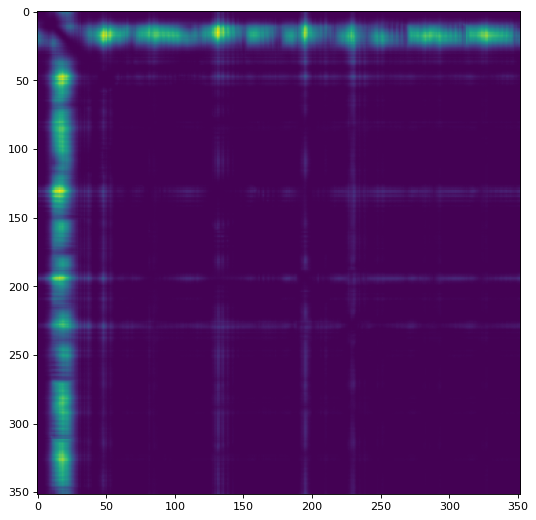

In [315]:
def distm(x):
    return data.distm_chain(x.unsqueeze(0))[0] 
    
util.plot_image( (distm(chn)-distm(x))**2 )
#util.plot_image(  )
util.plot_image( (distm(chn)-distm(coord))**2 )